# [실습] CNN활용_데이터증강_전이학습_개고양이 분류(Kaggel)_ResNet50_Data_Augmentation

* 데이터출처: https://www.kaggle.com/tongpython/cat-and-dog

In [ ]:
# 라이브러리 불러오기

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 모델 학습

### ImageDataGenerator

In [3]:
# 케라스로 ImageDataGenerator 클래스를 객체를 생성하고
# rescale 옵션을 지정해 이미지 각 픽셀의 값을 0~1로 정규화한다.
# 생성된 제너레이터 객체를 image_gen변수에 할당한다.
image_gen = ImageDataGenerator(rescale=(1/255.0))
image_gen

### flow_from_directory함수

In [6]:
# flow_from_directory함수로 폴더에서 이미지를 가져와 제너레이터 객체로 정리
train_dir = 'data/dogs-vs-cats/training_set/'
valid_dir = 'data/dogs-vs-cats/test_set/'

train_gen = image_gen.flow_from_directory(train_dir,
                                        batch_size=32,
                                        target_size=(224, 224),
                                        classes=['cats', 'dogs'],
                                        class_mode='binary',
                                        seed=2023)
valid_gen = image_gen.flow_from_directory(valid_dir,
                                        batch_size=32,
                                        target_size=(224, 224),
                                        classes=['cats', 'dogs'],
                                        class_mode='binary',
                                        seed=2023)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [12]:
# 샘플 이미지 출력(첫번째 배치)
batch = next(train_gen)
type(batch)
len(batch)
batch[0]
len(batch[1])

32

In [13]:
images, labels = batch[0], batch[1]

In [15]:
images.shape

(32, 224, 224, 3)

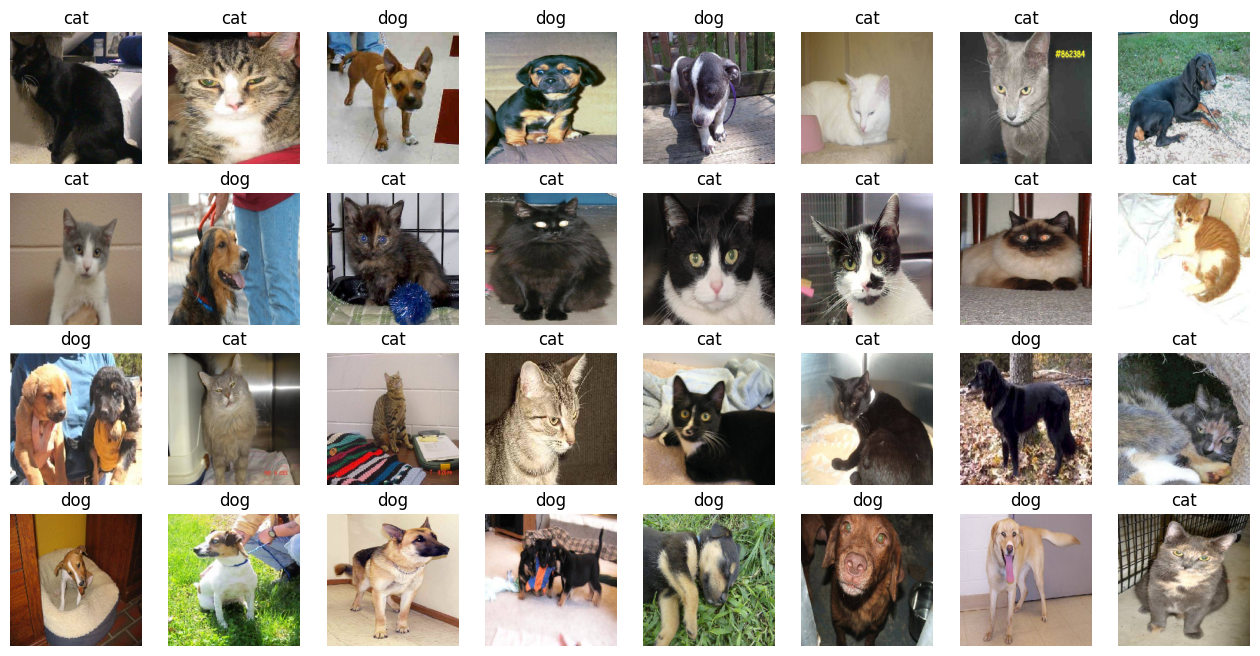

In [20]:
class_labels = ['cat', 'dog']
plt.figure(figsize=(16, 8))
for i in range(0, 32):
    ax = plt.subplot(4, 8, i+1)
    plt.axis('off')
    plt.title(class_labels[int(labels[i])])
    plt.imshow(images[i])
plt.show()

### 모델 훈련

In [21]:
# Sequential API를 활용하여 샘플 모델 생성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dense, Flatten, Dropout

model = Sequential(
    [# Feature Learning
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2,2)),
    BatchNormalization(),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2,2)),
    BatchNormalization(),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2,2)),
    BatchNormalization(),

    # Classifier Learning
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid') # 고양이거나 개이거나 -> softmax , 고양이거나 고양이가 아니거나 -> sigmoid , 여기서는 제너레이터를 
    ]                              # 위에서 binary로 선언을 했기때문에 노드가 하나여야 한다.
)

In [22]:
# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [23]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [24]:
# 모델 훈련
model.fit(train_gen, validation_data=valid_gen, epochs=20, verbose=2)

Epoch 1/20
251/251 - 331s - loss: 1.8040 - accuracy: 0.5621 - val_loss: 3.6562 - val_accuracy: 0.5072 - 331s/epoch - 1s/step
Epoch 2/20
251/251 - 323s - loss: 0.6328 - accuracy: 0.6297 - val_loss: 0.6909 - val_accuracy: 0.5719 - 323s/epoch - 1s/step
Epoch 3/20
251/251 - 336s - loss: 0.6143 - accuracy: 0.6560 - val_loss: 0.5756 - val_accuracy: 0.6955 - 336s/epoch - 1s/step
Epoch 4/20
251/251 - 353s - loss: 0.5690 - accuracy: 0.6836 - val_loss: 0.5789 - val_accuracy: 0.7252 - 353s/epoch - 1s/step
Epoch 5/20


KeyboardInterrupt: 

In [ ]:
model.save('255.1.cat_and_dog_without_aug.h5')

In [25]:
model = tf.keras.models.load_model('255.1_cat_and_dog_without_aug.h5')

In [28]:
model.history

In [ ]:
df = pd.DataFrame(.history)
df

In [30]:
df = pd.read_csv('255.1_cat_and_dog_without_aut.csv')
df

,loss,accuracy,val_loss,val_accuracy
0,1.878955,0.537539,3.369026,0.549184
1,0.650808,0.597127,0.644956,0.653485
2,0.616705,0.634978,0.569650,0.710331
3,0.591554,0.652842,0.589187,0.672763
4,0.574742,0.672580,0.561298,0.722689
5,0.552955,0.683323,0.562733,0.719229
6,0.554077,0.687570,0.590849,0.683144
7,0.529589,0.721299,0.507137,0.761740
8,0.500954,0.733042,0.577617,0.720712
9,0.466714,0.764397,0.615334,0.707860


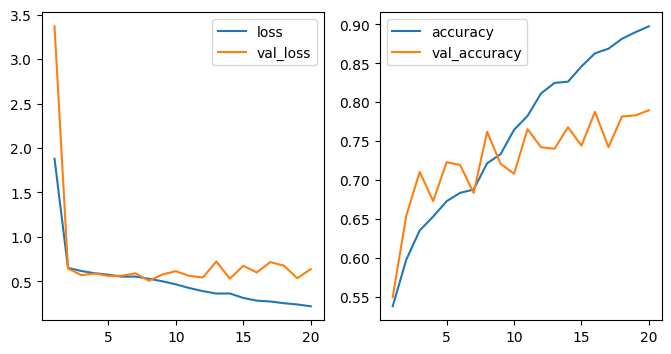

In [31]:
# 손실함수, 정확도 시각화
fig, ax = plt.subplots(figsize=(8, 4), nrows=1, ncols=2)

ax[0].plot(range(1, 21), df['loss'], label='loss')
ax[0].plot(range(1,21), df['val_loss'], label='val_loss')
ax[0].legend()
ax[1].plot(range(1, 21), df['accuracy'], label='accuracy')
ax[1].plot(range(1,21), df['val_accuracy'], label='val_accuracy')
ax[1].legend();

###  데이터 증강

In [ ]:
# 이미지 데이터 제너레이터 정의(  Augmentation 적용)
image_gen_aug = ImageDataGenerator(rescale = 1/255,
                                    horizontal_flip = True,
                                    rotation_range=30, 
                                    shear_range=0.15,
                                    zoom_range=0.3)

# flow_from_directory 함수로 폴더에서 이미지 가져와서 제너레이터 객체로 정리
train_gen_aug = image_gen_aug.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    target_size=(224, 224),
                                                    classes=['cats', 'dogs'],
                                                    class_mode ='binary',
                                                    seed=2020)
valid_gen_aug = image_gen_aug.flow_from_directory(valid_dir,
                                                    batch_size=32,
                                                    target_size=(224, 224),
                                                    classes=['cats', 'dogs'],
                                                    class_mode ='binary',
                                                    seed=2020)

In [ ]:
# 모델 생성


In [ ]:
# 모델 컴파일
model_aug.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), 
                  loss = tf.keras.losses.BinaryCrossentropy(from_logits=False),
                 metrics=['accuracy'])

In [ ]:
# 모델 훈련
history_aug = model_aug.fit(train_gen_aug, validation_data = valid_gen_aug, epochs=40)

In [ ]:
model_aug.save('255.1_cnn_catsndogs_data_aug.h5')

In [ ]:
import pandas as pd
df = pd.DataFrame(history_aug.history)
df.to_csv("./output/255.1_데이터증강_history.csv", index=False)
df = pd.read_csv("./output/255.1_데이터증강_history.csv")
df

In [ ]:
# 손실함수, 정확도 그래프 그리기

import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.plot(range(1, 21), df['loss'], label='train_loss')
plt.plot(range(1, 21), df['val_loss'], label='val_loss');